## **Step 1 :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## **Step 2 :**
### Preparations

For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Generate random data dictionary
n = 5000  # Number of data points
data = {
    'Date': pd.date_range('2024-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n),
}


In [3]:
df = pd.DataFrame(data)
df['Retweets'] = df['Likes'] * np.random.uniform(0.5, 2, size=n)  # Generate retweets correlated with likes
df['Length'] = np.random.randint(50, 200, size=n)  # Generate random tweet length
df['Engagement'] = df['Likes'] * np.random.uniform(0.5, 1.5, size=n)  # Generate engagement correlated with likes
df['Popularity'] = np.random.randint(0, 100, size=n)  # Generate random popularity
df.head()

,Date,Category,Likes,Retweets,Length,Engagement,Popularity
0,2024-01-01,Fitness,7967,13884.049819,199,10465.686340,83
1,2024-01-02,Culture,4087,2846.404228,133,4473.391556,8
2,2024-01-03,Health,4008,7099.900420,84,3654.041705,98
3,2024-01-04,Family,9625,10332.153715,89,9526.473755,82
4,2024-01-05,Health,585,311.993561,148,365.405536,76


In [4]:
df.dtypes

Date          datetime64[ns]
Category              object
Likes                  int32
Retweets             float64
Length                 int32
Engagement           float64
Popularity             int32
dtype: object

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5000 non-null   datetime64[ns]
 1   Category    5000 non-null   object        
 2   Likes       5000 non-null   int32         
 3   Retweets    5000 non-null   float64       
 4   Length      5000 non-null   int32         
 5   Engagement  5000 non-null   float64       
 6   Popularity  5000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 215.0+ KB


## **Step 3 :**
## Likes Column Description and Histogram


count    5000.000000
mean     4966.580200
std      2862.707648
min        15.000000
25%      2469.750000
50%      4970.000000
75%      7439.250000
max      9999.000000
Name: Likes, dtype: float64


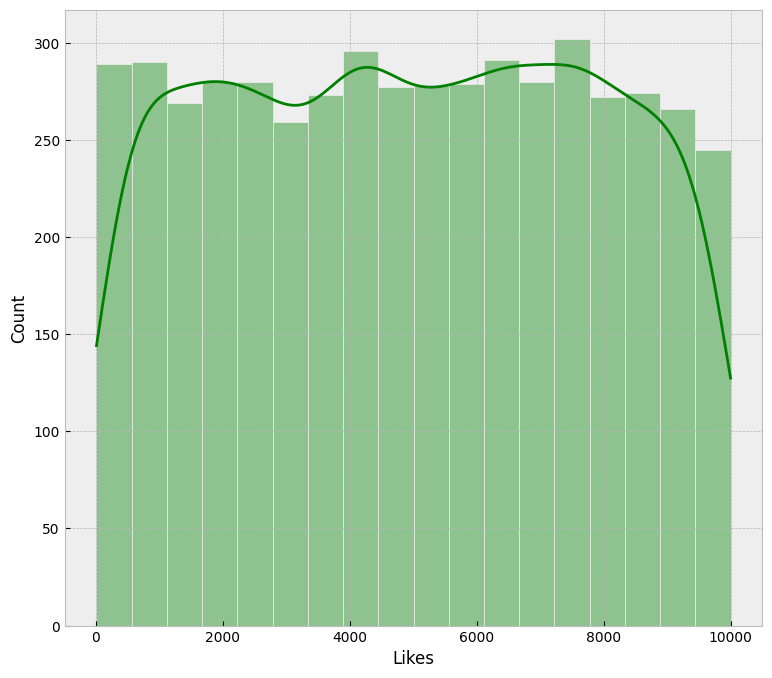

In [6]:
print(df['Likes'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['Likes'], color='g', kde=True, alpha=0.4)
plt.show()


The data presented below provides a summary statistics of the 'Likes' column:

- **Count**: Indicates the total number of observations, which is 5000.
- **Mean**: Represents the average number of likes per observation, calculated to be approximately 5046.87.
- **Std**: Reflects the standard deviation, a measure of the dispersion or spread of the data, which is approximately 2879.80.
- **Min**: Represents the minimum value observed in the 'Likes' column, which is 2.
- **25%**: Denotes the value at the 25th percentile, indicating that 25% of the data lies below 2520.75.
- **50%**: Represents the median or the value at the 50th percentile, indicating that 50% of the data falls below and above 5119.5.
- **75%**: Denotes the value at the 75th percentile, indicating that 75% of the data lies below 7527.
- **Max**: Represents the maximum value observed in the 'Likes' column, which is 9999.

This summary provides insights into the distribution and characteristics of the 'Likes' data.

In [7]:
df.head()

,Date,Category,Likes,Retweets,Length,Engagement,Popularity
0,2024-01-01,Fitness,7967,13884.049819,199,10465.686340,83
1,2024-01-02,Culture,4087,2846.404228,133,4473.391556,8
2,2024-01-03,Health,4008,7099.900420,84,3654.041705,98
3,2024-01-04,Family,9625,10332.153715,89,9526.473755,82
4,2024-01-05,Health,585,311.993561,148,365.405536,76


In [20]:
df_num = df.select_dtypes(include = ['float64', 'int32'])
# This line of code selects columns from the DataFrame 'df' that have numeric data types,


#### Correlation Matrix Heatmap


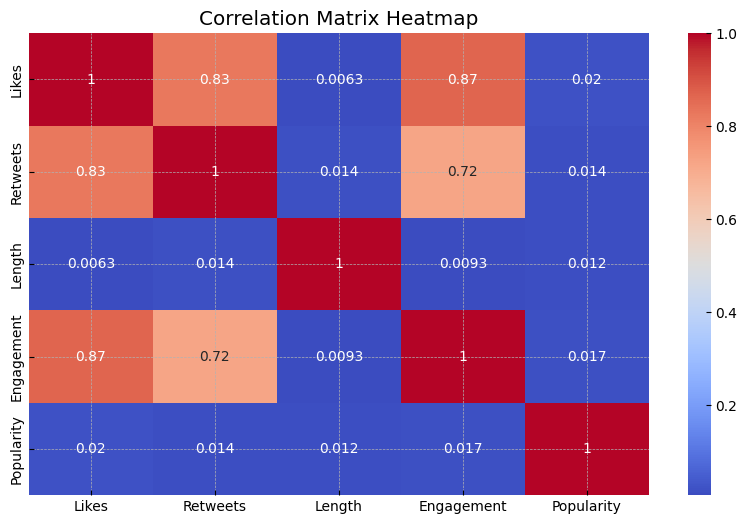

In [21]:
correlation_matrix = df_num.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Pairplot of Numeric Columns with Likes


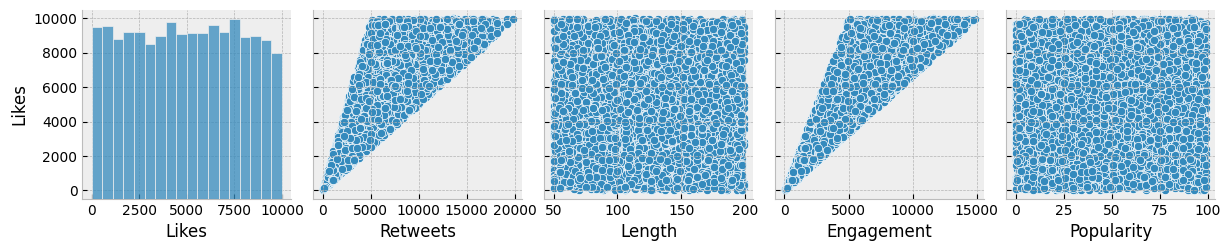

In [10]:
sns.pairplot(data=df_num, x_vars=df_num.columns, y_vars=["Likes"])

In [22]:
import operator

individual_features_df = []
for i in ['Date',  'Retweets', 'Length',
       'Engagement', 'Popularity']:
    tmpDf = df[[i, 'Likes']]
    individual_features_df.append(tmpDf)
all_correlations = {feature.columns[0]: feature.corr()['Likes'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

           Date: -0.016106577029872074
         Length: 0.006292610991303195
     Popularity: 0.019981042242100504
       Retweets: 0.8266219293016435
     Engagement: 0.8657717758991207


C:\Users\ASUS\AppData\Local\Temp\ipykernel_920\91580498.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_correlations = {feature.columns[0]: feature.corr()['Likes'][0] for feature in individual_features_df}


## Correlation Analysis of Individual Features with Likes

This code calculates the correlation coefficient between each individual feature (Date, Retweets, Length, Engagement, Popularity) and the 'Likes' column in the DataFrame. The correlations are then sorted in ascending order and printed. The output shows the correlation coefficient value for each feature with 'Likes', where positive values indicate a positive correlation and negative values indicate a negative correlation. Strong correlations are observed between 'Retweets' and 'Likes', as well as between 'Engagement' and 'Likes'.


In [13]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with Likes:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Likes:
['Retweets', 'Engagement']


In this section, we analyze the correlation between features in the dataset, excluding the 'Likes' and 'Category' columns, as they were previously examined for their correlations with the target variable. 


<Axes: >

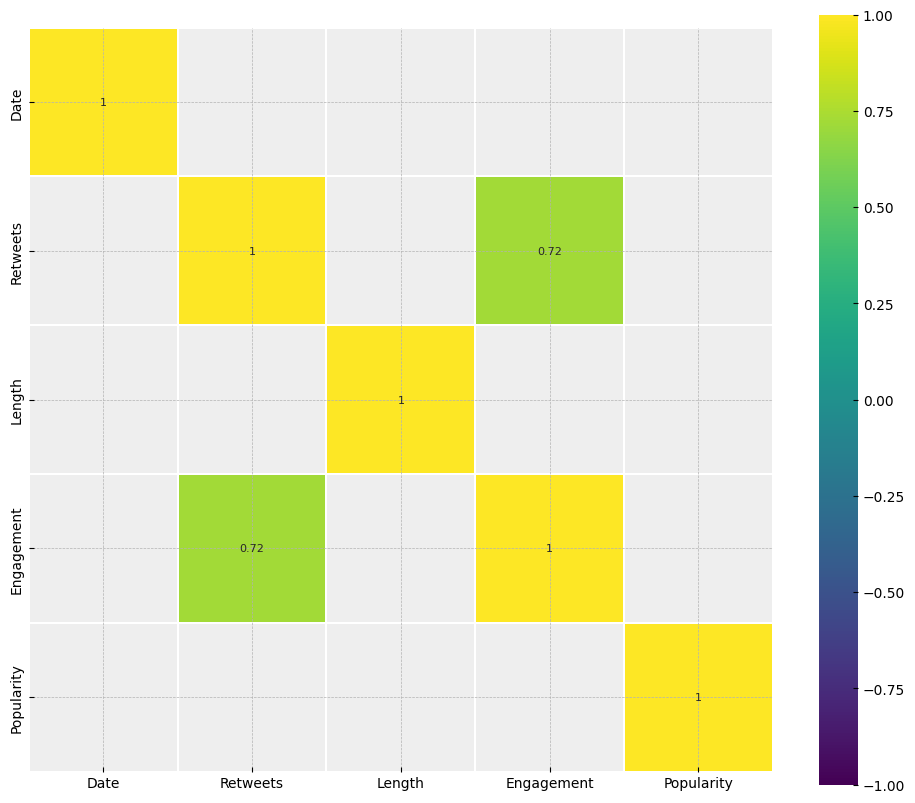

In [14]:
corr = df.drop(['Likes','Category'], axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [15]:
golden_features_list.append('Likes')
golden_features_list

['Retweets', 'Engagement', 'Likes']

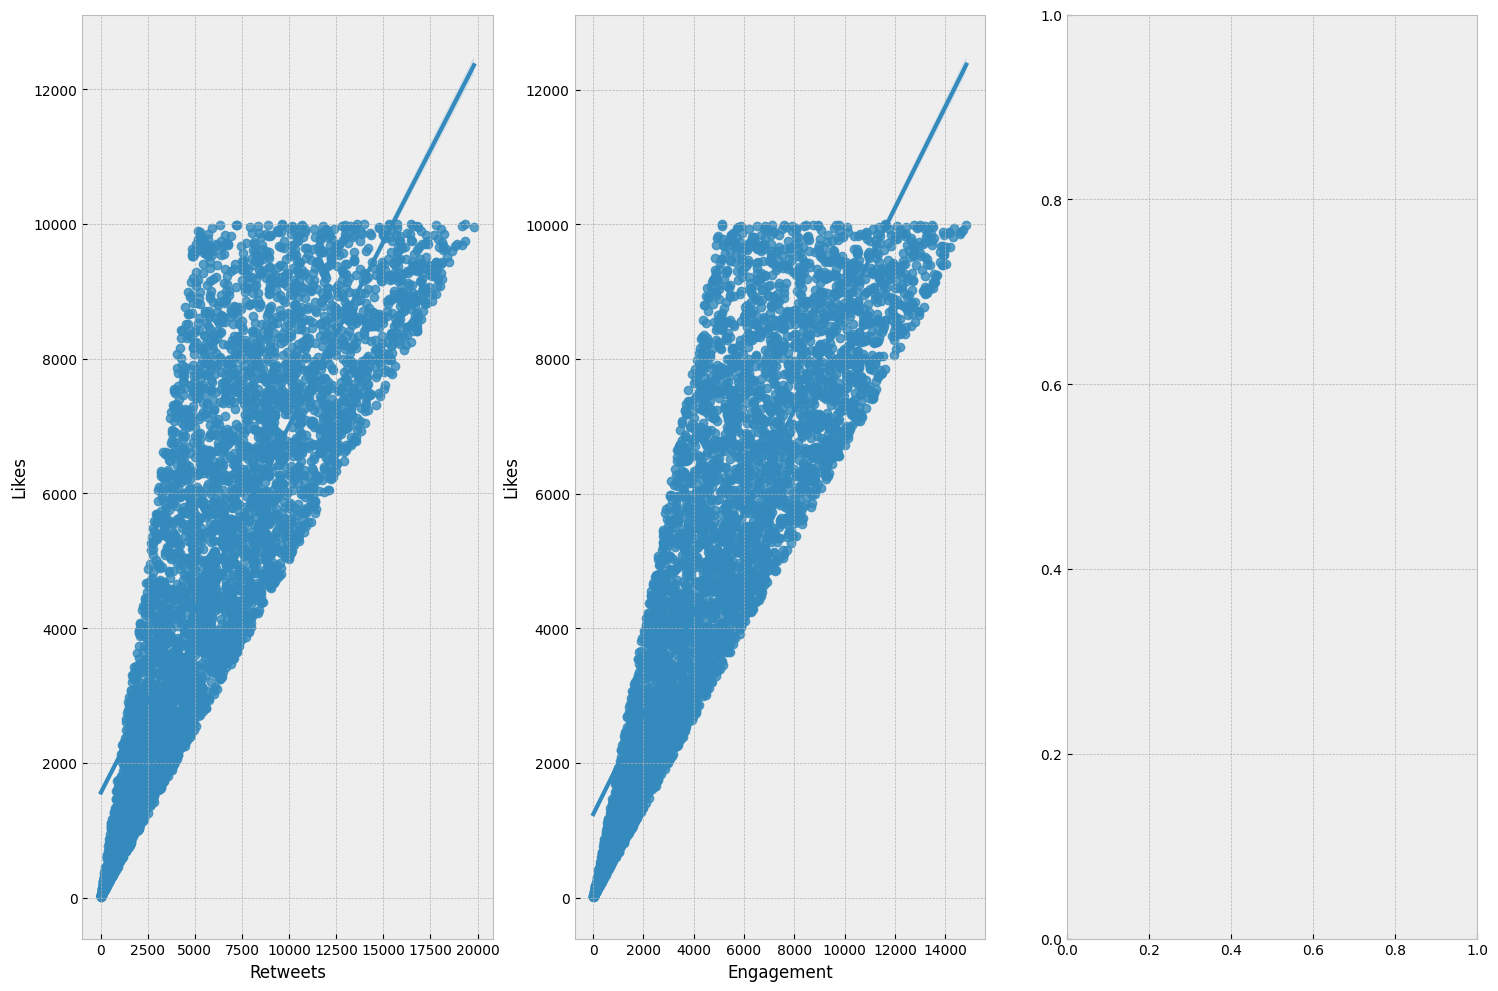

In [16]:
fig, ax = plt.subplots(round(len(golden_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list) - 1:
        sns.regplot(x=golden_features_list[i],y='Likes', data=df[golden_features_list], ax=ax)

## Boxplot Analysis of Likes by Category

In this section, we analyze the distribution of 'Likes' across different categories using a boxplot visualization.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fitness'),
  Text(1, 0, 'Culture'),
  Text(2, 0, 'Health'),
  Text(3, 0, 'Family'),
  Text(4, 0, 'Food'),
  Text(5, 0, 'Travel'),
  Text(6, 0, 'Music'),
  Text(7, 0, 'Fashion')])

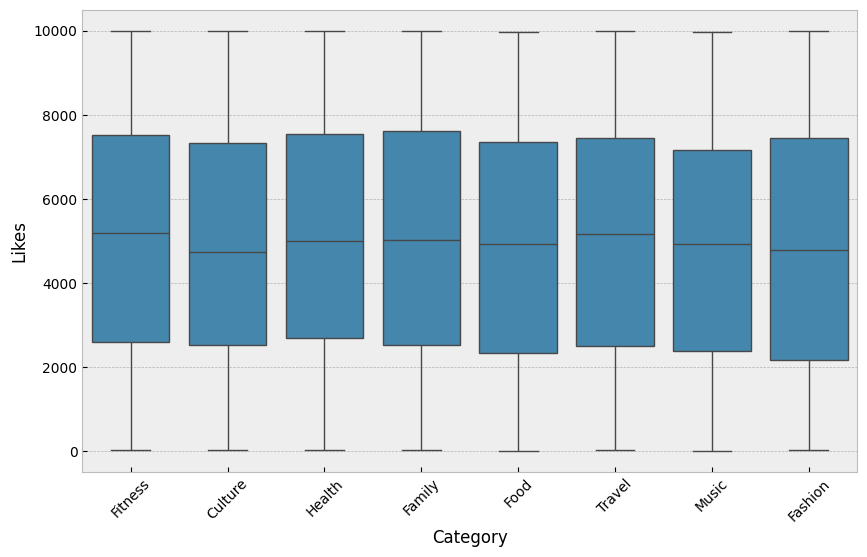

In [17]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Category', y='Likes', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [18]:
df_not_num = df[['Category']]

## Countplot Analysis of Categorical Features

In this section, we visualize the count distribution of categorical features using countplots.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_920\1986751695.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)


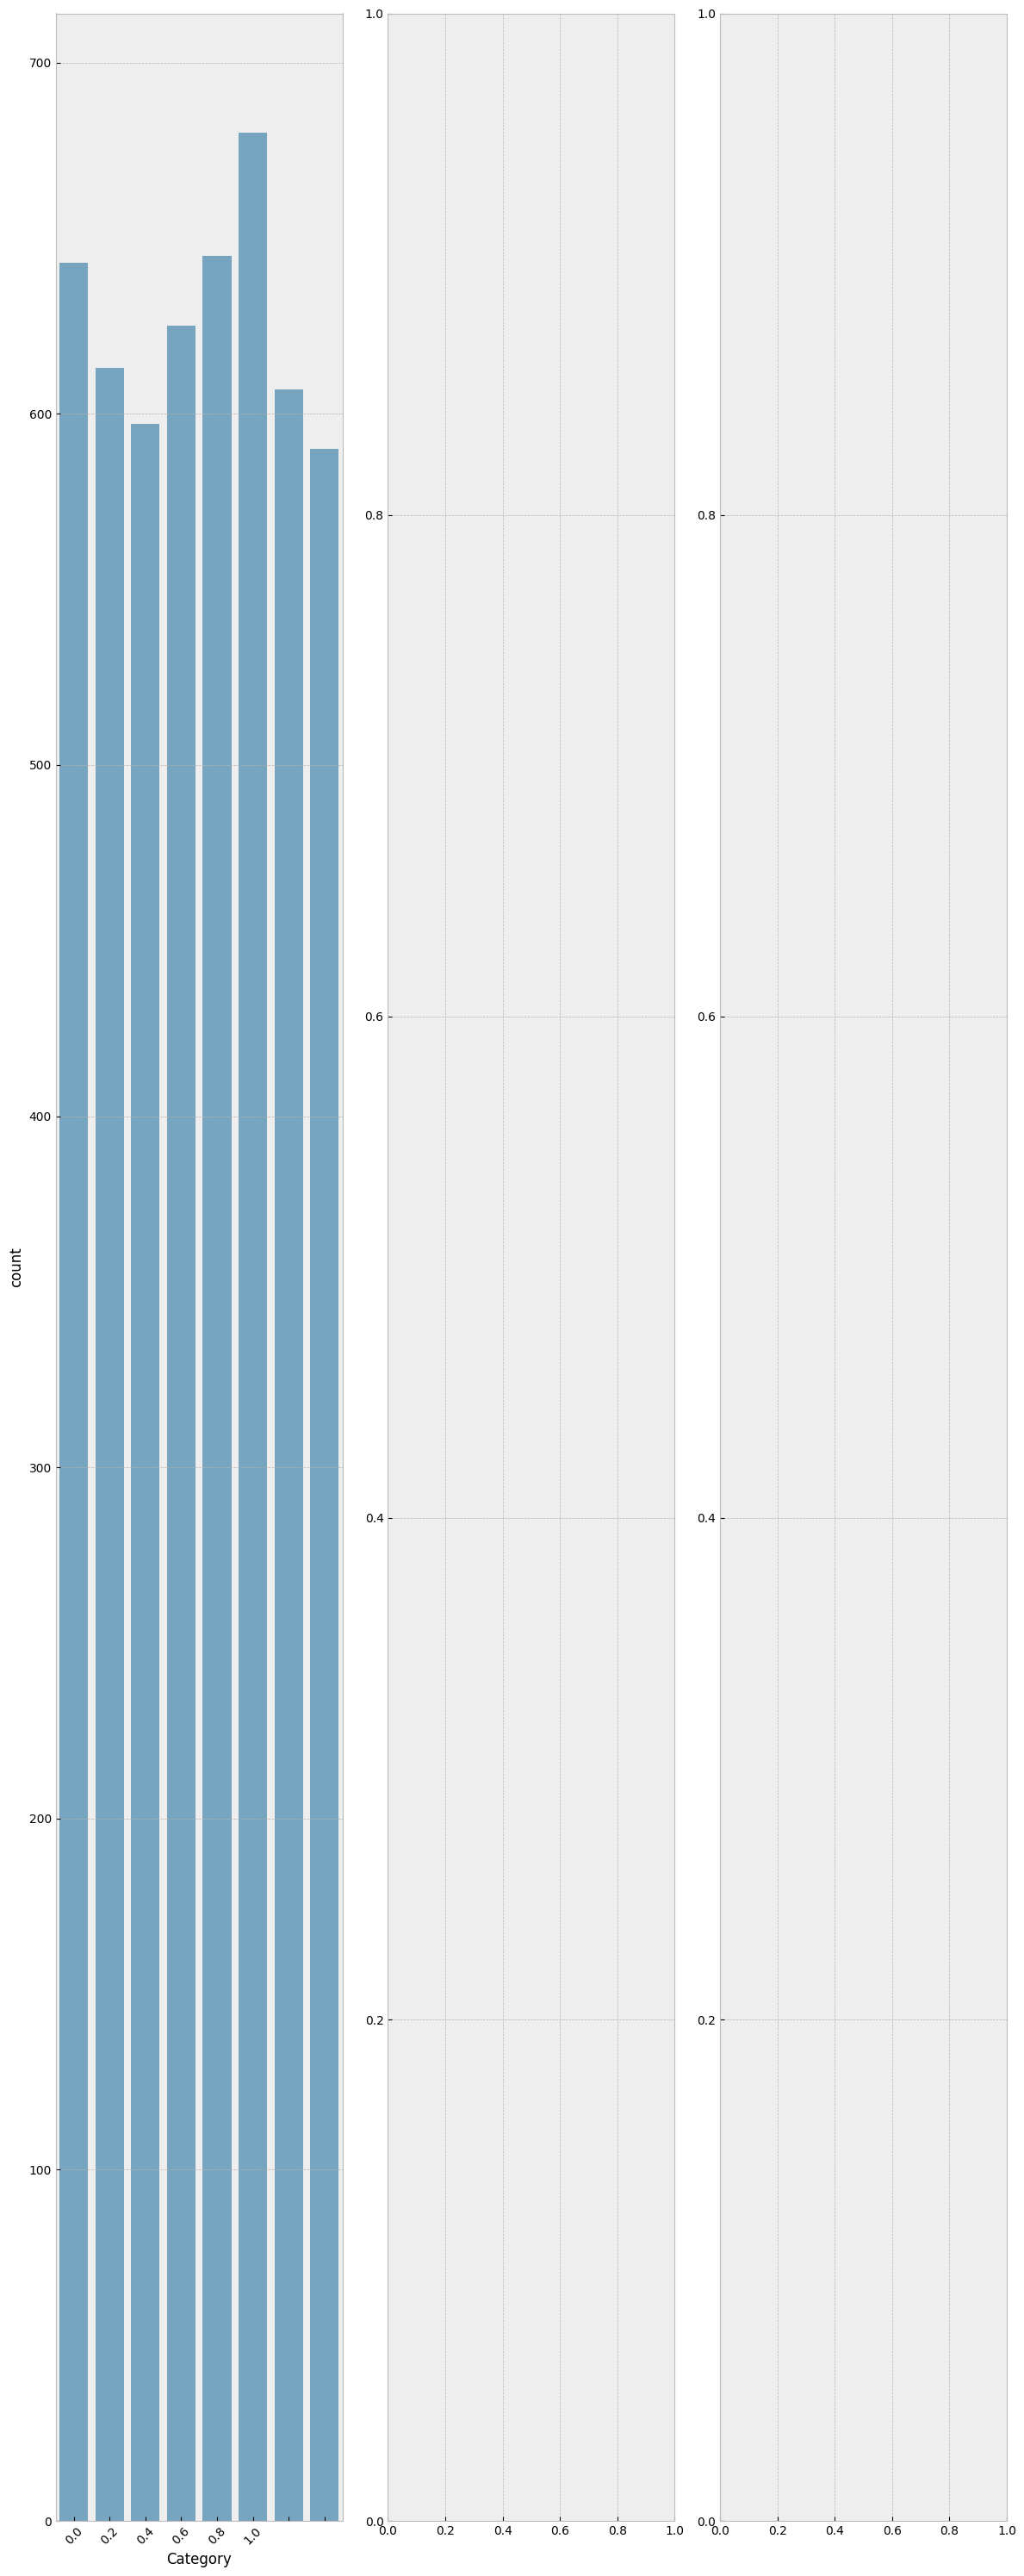

In [19]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3)+1, 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()